In [31]:
from module import readFitsBz2
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

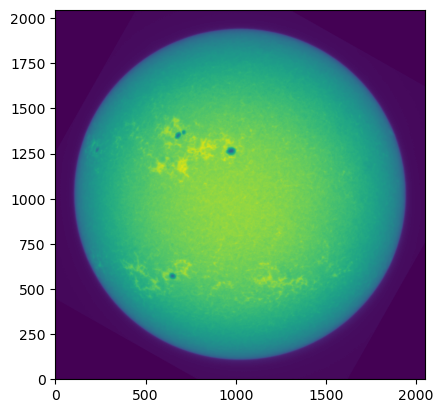

In [32]:
'data/L2/imoa_03933_l2_20240323_13052647_emi1.fts.bz2'
hdu = readFitsBz2('data/L2/imoa_03933_l2_20230323_09150652_emi1.fts.bz2')

img = hdu.data
plt.imshow(img, origin='lower')


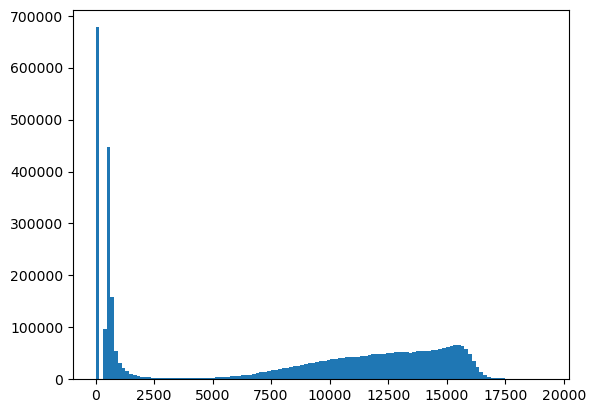

In [33]:
plt.hist(img.flatten(), bins='auto');

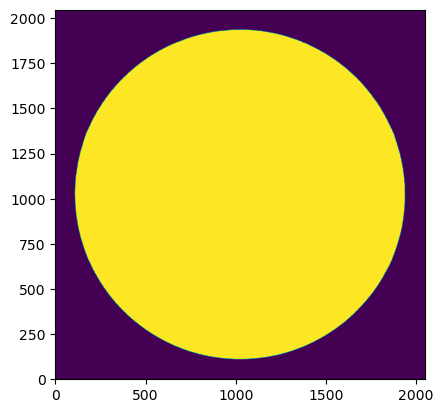

In [34]:
ret, disk = cv.threshold(img,5000,255,cv.THRESH_BINARY)
disk=disk.astype(np.uint8)
plt.imshow(disk, origin='lower');

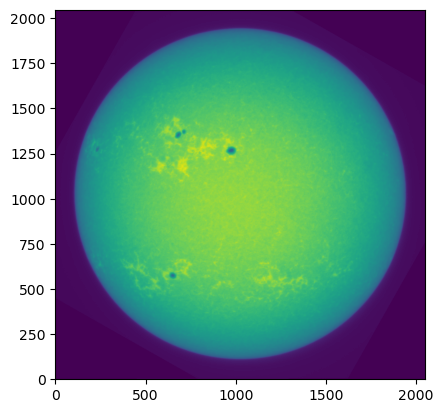

In [35]:
contours, _ = cv.findContours(disk, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Assuming the disk is the largest contour
largest_contour = max(contours, key=cv.contourArea)

# Calculate centroid
M = cv.moments(largest_contour)
centroid_x = int(M["m10"] / M["m00"])
centroid_y = int(M["m01"] / M["m00"])

# Calculate translation required to center the centroid
rows, cols = disk.shape
center_x = cols // 2
center_y = rows // 2
translation_x = center_x - centroid_x
translation_y = center_y - centroid_y

# Translate the image
translated_image = np.roll(img, translation_x, axis=1)
translated_image = np.roll(translated_image, translation_y, axis=0)

plt.imshow(translated_image, origin='lower')